# Example 5 - Inclined Layers cut by Fault

This example will show how to convert the geological map below to a `GemPy` model. This example is based on digitized data. The area is 2978 m wide (W-E extent) and 3728 m high (N-S extent). 

The table below shows the result of a drilling campaign carried out at 5 different points (A-F). For Coal1, the base of the layer is noted. For a sand layer the whole segment is noted. A second coal seam was only encountered at locations B, C and D. The numbers in meter indicate where layer boundaries where encountered below the surface. 

|      | A    | B    | C    | D    | E    | F    |
|------|------|------|------|------|------|------|
|Coal1 |100 m | 50 m | 50 m | 50 m | 150 m| 250 m|
| Sand |100-130 m | 50-100 m | 50-100 m | 50-100 m | 150-220 m| 250-300 m| 
|Coal2 |?     | 100 m| 100 m| 100 m|     ?|     ?|


Coal seam 1 is already outcropping in the area and partial layer boundaries and orientation measurements are provided. Coal seam 2 was not found at locations E and F nor at the surface. The indicated line marks custom section number 1. 


<img src="../../../gemgis/data/examples/example5/task5.png" width="300">

# Importing Libraries

In [1]:
import sys
sys.path.append('../../../gemgis')
import gemgis as gg
import geopandas as gpd
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


# Load Data

The data is loaded as for the previous example. However, orientations are not loaded as these will be calculated by available strike lines as shown in the tutorials. 

In [2]:
base_map = rasterio.open('../../../gemgis/data/examples/example5/task5.tif')
interfaces = gpd.read_file('../../../gemgis/data/examples/example5/interfaces5_lines.shp')
# orientations = gpd.read_file('../../../gemgis/data/examples/example5/orientations5.shp')
extent = gpd.read_file('../../../gemgis/data/examples/example5/extent5.shp')
# geological_map = gpd.read_file('../../../gemgis/data/examples/example5/geolmap5.shp')
topo = gpd.read_file('../../../gemgis/data/examples/example5/topo5.shp')
custom_section = gpd.read_file('../../../gemgis/data/examples/example5/customsections5.shp')

# Inspect Data

In [3]:
interfaces.head()

,id,formation,geometry
0,None,Coal1,"LINESTRING (792.016 3717.573, 792.016 3717.573..."
1,None,Coal1,"LINESTRING (1456.629 1043.919, 1456.629 1043.9..."


In [4]:
extent.head()

,id,geometry
0,None,"POLYGON ((0.000 0.000, 0.000 3728.000, 2978.00..."


In [5]:
topo.head()

,id,Z,geometry
0,None,200,"LINESTRING (151.591 8.547, 227.032 59.217, 273..."
1,None,100,"LINESTRING (2174.989 10.799, 2161.477 34.445, ..."
2,None,150,"LINESTRING (1870.409 4.043, 1860.838 33.882, 1..."
3,None,250,"LINESTRING (1998.772 1855.165, 2031.425 1825.8..."
4,None,150,"LINESTRING (2977.254 2515.556, 2959.238 2525.1..."


# Create GemPy Data Class

In [6]:
geo_data = gg.GemPyData(model_name='Model5', 
                        crs='EPSG:4326')

In [7]:
vars(geo_data)

{'model_name': 'Model5',
 'crs': 'EPSG:4326',
 'extent': None,
 'resolution': None,
 'interfaces': None,
 'orientations': None,
 'section_dict': None,
 'stack': None,
 'dem': None,
 'surface_colors': None,
 'geolmap': None,
 'basemap': None,
 'faults': None,
 'is_fault': None,
 'raw_i': None,
 'raw_o': None,
 'raw_dem': None,
 'slope': None,
 'hillshades': None,
 'aspect': None,
 'wms': None,
 'tectonics': None,
 'customsections': None,
 'contours': None}

# Set Extent

In [8]:
geo_data.set_extent(gdf=extent, minz=-200, maxz=500)
geo_data.extent

[0.0, 2978.0, 0.0, 3728.0, -200, 500]

# Set Resolution

In [9]:
geo_data.set_resolution(50,50,50)
geo_data.resolution

[50, 50, 50]

# Attribute Data to Data Class

In [10]:
geo_data.set_extent(0.0, 2978.0, 0.0, 3728.0, -200, 500)
geo_data.extent

[0.0, 2978.0, 0.0, 3728.0, -200, 500]

In [11]:
geo_data.raw_i = interfaces
geo_data.raw_i

,id,formation,geometry
0,None,Coal1,"LINESTRING (792.016 3717.573, 792.016 3717.573..."
1,None,Coal1,"LINESTRING (1456.629 1043.919, 1456.629 1043.9..."


In [12]:
geo_data.basemap = base_map.read(1)
geo_data.basemap

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,  57,  57,  57],
       ...,
       [255, 255, 255, ..., 215, 220, 219],
       [255, 255, 255, ..., 115, 135, 132],
       [255, 255, 255, ...,  52,  70,  68]], dtype=uint8)

In [13]:
geo_data.customsections = custom_section
geo_data.customsections

,id,section,geometry
0,None,Section1,"LINESTRING (893.264 2.777, 2101.448 3725.429)"


In [14]:
geo_data.contours = topo
geo_data.contours

,id,Z,geometry
0,None,200,"LINESTRING (151.591 8.547, 227.032 59.217, 273..."
1,None,100,"LINESTRING (2174.989 10.799, 2161.477 34.445, ..."
2,None,150,"LINESTRING (1870.409 4.043, 1860.838 33.882, 1..."
3,None,250,"LINESTRING (1998.772 1855.165, 2031.425 1825.8..."
4,None,150,"LINESTRING (2977.254 2515.556, 2959.238 2525.1..."
5,None,350,"LINESTRING (496.143 3720.925, 546.812 3670.255..."
6,None,250,"LINESTRING (1416.074 3715.295, 1467.869 3684.8..."
7,None,300,"LINESTRING (793.403 3720.925, 805.789 3672.507..."
8,None,250,"LINESTRING (5.213 1394.637, 33.362 1376.621, 8..."
9,None,200,"LINESTRING (2768.384 2869.679, 2719.966 2893.3..."


# Plot Data

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

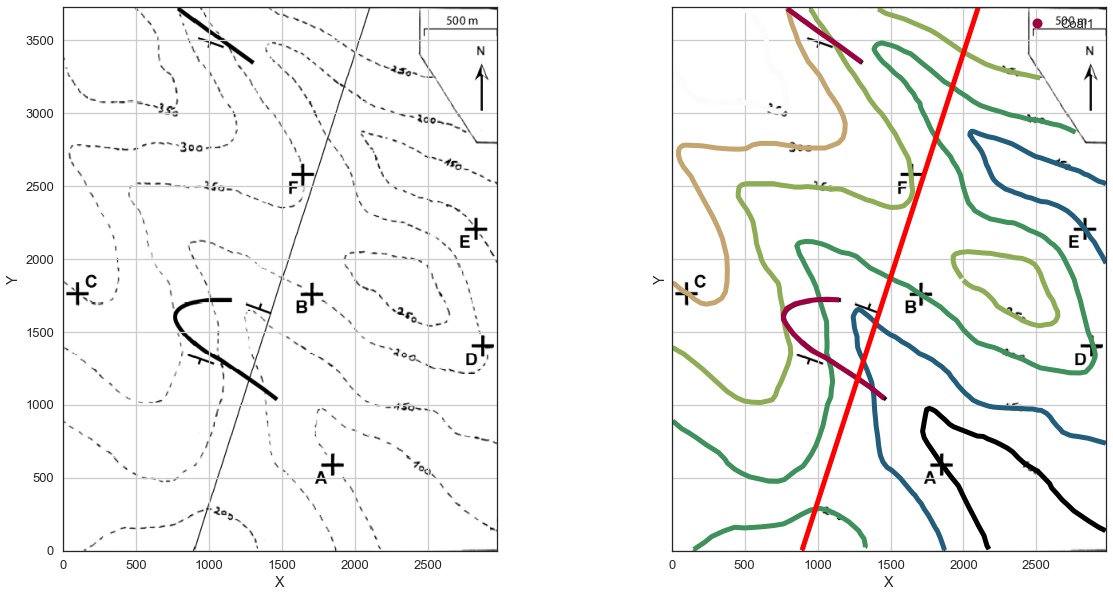

In [15]:
gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_basemap=True,
                           show_customsections=True,
                           show_contours=True,
                           cmap_interfaces='Spectral',
                           cmap_contours='gist_earth'
                           )

# Interpolate Topography
Due to the complexity of the topography, only 100 points are chosen to interpolate the raster.

In [16]:
dem = gg.vector.interpolate_raster(topo, method='rbf', n= 100, seed=4, extent=geo_data.extent[:4])
geo_data.raw_dem = dem
geo_data.raw_dem

array([[382.14080428, 382.09554027, 382.05027424, ..., 276.92426398,
        276.9293738 , 276.93452239],
       [382.10098569, 382.05576908, 382.01055058, ..., 276.84018678,
        276.84528593, 276.85042389],
       [382.06114582, 382.01597663, 381.97080565, ..., 276.75608555,
        276.76117404, 276.76630141],
       ...,
       [240.90546929, 240.83103951, 240.75666389, ..., 108.54185854,
        108.58411752, 108.6267485 ],
       [240.94098062, 240.8665773 , 240.79222808, ..., 108.60983272,
        108.65203558, 108.69460779],
       [240.97651579, 240.90213886, 240.82781598, ..., 108.67786065,
        108.72000754, 108.76252117]])

(<Figure size 1440x720 with 2 Axes>,
 <AxesSubplot:xlabel='X', ylabel='Y'>,
 <AxesSubplot:xlabel='X', ylabel='Y'>)

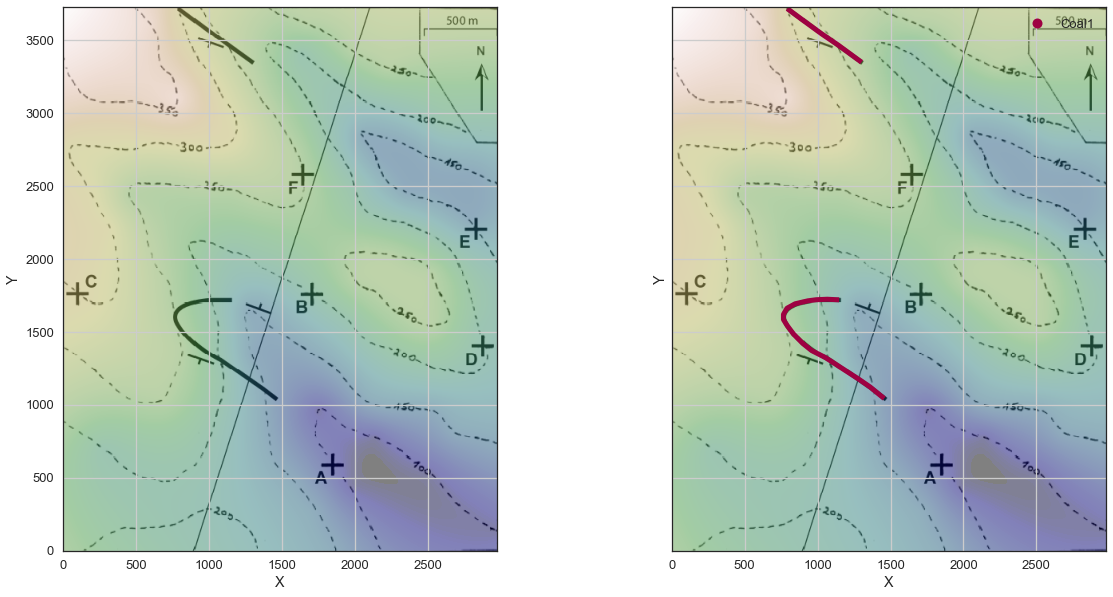

In [17]:
gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_topo=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral',
                           cmap_contours='gist_earth'
                           )

# Save Topography as Raster

In [18]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example5/topo.tif',np.flipud(dem), crs='EPSG:4326', extent=[0, 3000, 0, 3750])

In [19]:
topography = rasterio.open('../../../gemgis/data/examples/example5/topo.tif')
topography

<open DatasetReader name='../../../gemgis/data/examples/example5/topo.tif' mode='r'>

# Set Interfaces

In [20]:
interfaces_coords = gg.vector.extract_coordinates(interfaces,topography, reset_index=False)
interfaces_coords.head()

,formation,geometry,points,X,Y,Z
0,Coal1,"LINESTRING (792.016 3717.573, 792.016 3717.573...","(792.0159136742865, 3717.573390174757)",792.02,3717.57,305.65
0,Coal1,"LINESTRING (792.016 3717.573, 792.016 3717.573...","(792.0159136742865, 3717.573390174757)",792.02,3717.57,305.65
0,Coal1,"LINESTRING (792.016 3717.573, 792.016 3717.573...","(921.2228614389301, 3622.1460365969483)",921.22,3622.15,291.49
0,Coal1,"LINESTRING (792.016 3717.573, 792.016 3717.573...","(1030.1620526914726, 3542.7639902578862)",1030.16,3542.76,282.83
0,Coal1,"LINESTRING (792.016 3717.573, 792.016 3717.573...","(1139.945733798686, 3468.4488830468495)",1139.95,3468.45,273.01


In [21]:
geo_data.to_gempy_df(interfaces_coords, 'interfaces')
geo_data.interfaces

,index,X,Y,Z,formation
0,0,792.02,3717.57,305.65,Coal1
1,0,792.02,3717.57,305.65,Coal1
2,0,921.22,3622.15,291.49,Coal1
3,0,1030.16,3542.76,282.83,Coal1
4,0,1139.95,3468.45,273.01,Coal1
5,0,1301.24,3350.22,255.21,Coal1
6,0,1301.24,3350.22,255.21,Coal1
7,1,1456.63,1043.92,141.52,Coal1
8,1,1456.63,1043.92,141.52,Coal1
9,1,1359.51,1123.30,154.09,Coal1


# Set Orientations

As orientations were not loaded, they have to be calculated based on strike lines provided for the lithological layers and the fault. 

## Load Fault Data and Calculate Orientations

A file containing missing strike values cannot be used to calculate orientations. Therefore, strike lines need to be interpolated with `gg.utils.interpolate_strike_lines(...)`. 

In [22]:
strike = gpd.read_file('../../../gemgis/data/examples/example5/lines5_strike.shp')
gdf = strike.copy(deep=True)
gdf

,id,Z,formation,geometry
0,7,0,Coal1,"LINESTRING (1642.839 2582.579, 2829.348 2205.937)"
1,6,150,Coal1,"LINESTRING (1705.332 1759.201, 2875.795 1406.768)"
2,5,200,Coal1,"LINESTRING (1017.766 1722.234, 2979.938 1137.003)"
3,4,250,Coal1,"LINESTRING (99.956 1763.424, 765.837 1620.705,..."
4,3,200,Coal1,"LINESTRING (1078.147 1313.501, 2963.048 752.760)"
5,2,150,Coal1,"LINESTRING (1387.230 1097.312, 2968.115 619.330)"
6,1,0,Coal1,"LINESTRING (1152.462 806.807, 2966.426 249.444)"
7,8,250,Coal1,"LINESTRING (1103.482 3493.974, 2974.871 2872.429)"


In order to interpolate strike lines, the GeoDataFrame containing the incomplete set of strike lines and the height increment between each strike line needs to be provided. Currently, a linear interpolation is performed to obtain the missing strike lines. 

In [23]:
gdf_out = gg.utils.interpolate_strike_lines(gdf, 50)

## Plotting Strike Lines

<AxesSubplot:xlabel='X', ylabel='Y'>

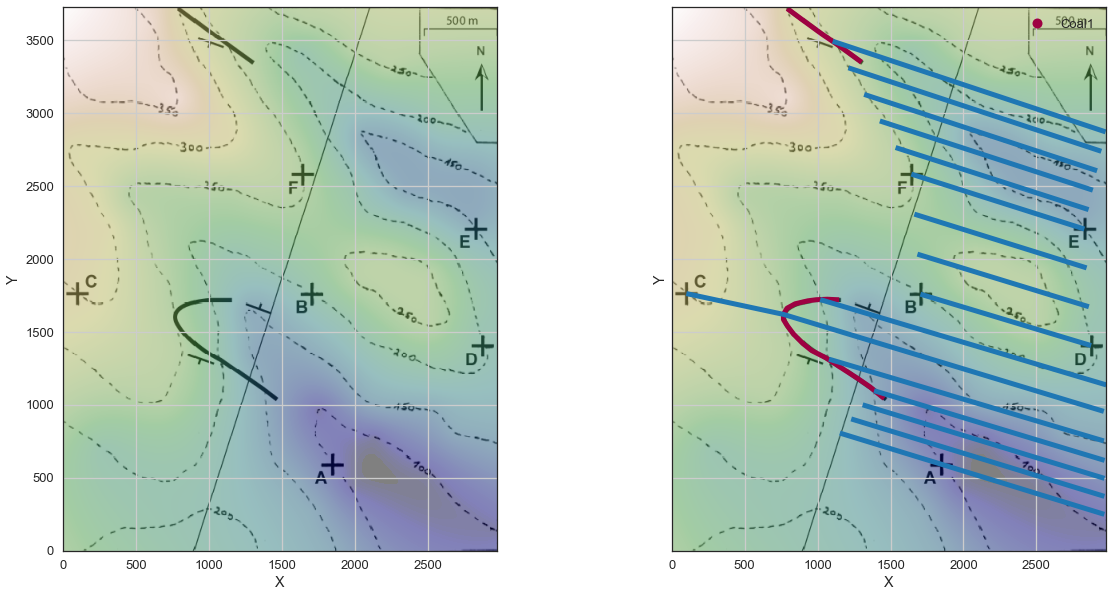

In [24]:
fig, ax1, ax2 = gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_topo=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral',
                           cmap_contours='gist_earth'
                           )
gdf_out.plot(ax=ax2, column = 'formation', legend = False, linewidth = 5, aspect='equal')


## Calculate Orientations

In [25]:
orientations_coords = gg.utils.calculate_orientations(gdf_out.reset_index())
orientations_coords

,X,Y,Z,dip,azimuth,polarity,formation
0,2079.15,583.16,25.00,23.18,197.04,1,Coal1
1,2118.56,693.22,75.00,23.18,196.96,1,Coal1
2,2157.97,803.29,125.00,23.18,196.87,1,Coal1
3,2099.14,945.73,175.00,22.20,196.67,1,Coal1
4,1574.01,1281.17,230.00,14.36,196.14,1,Coal1
5,1565.31,1439.76,230.00,14.64,16.25,1,Coal1
6,2144.71,1506.30,175.00,12.24,16.65,1,Coal1
7,2281.48,1718.20,125.00,11.16,16.90,1,Coal1
8,2263.33,1988.62,75.00,11.18,17.19,1,Coal1
9,2245.17,2259.05,25.00,11.20,17.47,1,Coal1


## Plot Orientations

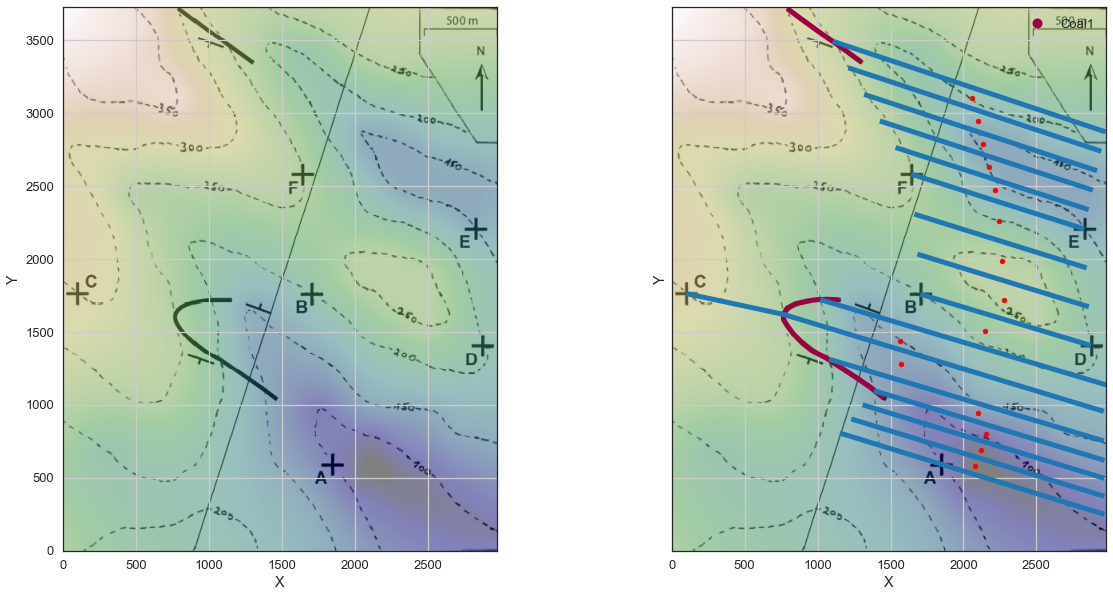

In [26]:
fig, ax1, ax2 = gg.visualization.plot_data(geo_data, 
                           show_interfaces=True,
                           show_orientations=True,
                           show_basemap=True,
                           show_topo=True,
                           cmap_interfaces='Spectral',
                           cmap_orientations='Spectral',
                           cmap_contours='gist_earth'
                           )
gdf_out.plot(ax=ax2, column = 'formation', legend = False, linewidth = 5, aspect='equal')

ax2.scatter(orientations_coords.X, orientations_coords.Y, s=25, c='r')


In [27]:
geo_data.orientations = orientations_coords
geo_data.orientations

,X,Y,Z,dip,azimuth,polarity,formation
0,2079.15,583.16,25.00,23.18,197.04,1,Coal1
1,2118.56,693.22,75.00,23.18,196.96,1,Coal1
2,2157.97,803.29,125.00,23.18,196.87,1,Coal1
3,2099.14,945.73,175.00,22.20,196.67,1,Coal1
4,1574.01,1281.17,230.00,14.36,196.14,1,Coal1
5,1565.31,1439.76,230.00,14.64,16.25,1,Coal1
6,2144.71,1506.30,175.00,12.24,16.65,1,Coal1
7,2281.48,1718.20,125.00,11.16,16.90,1,Coal1
8,2263.33,1988.62,75.00,11.18,17.19,1,Coal1
9,2245.17,2259.05,25.00,11.20,17.47,1,Coal1


# Check Data Class

In [28]:
vars(geo_data)

{'model_name': 'Model5',
 'crs': 'EPSG:4326',
 'extent': [0.0, 2978.0, 0.0, 3728.0, -200, 500],
 'resolution': [50, 50, 50],
 'interfaces':     index       X       Y      Z formation
 0       0  792.02 3717.57 305.65     Coal1
 1       0  792.02 3717.57 305.65     Coal1
 2       0  921.22 3622.15 291.49     Coal1
 3       0 1030.16 3542.76 282.83     Coal1
 4       0 1139.95 3468.45 273.01     Coal1
 5       0 1301.24 3350.22 255.21     Coal1
 6       0 1301.24 3350.22 255.21     Coal1
 7       1 1456.63 1043.92 141.52     Coal1
 8       1 1456.63 1043.92 141.52     Coal1
 9       1 1359.51 1123.30 154.09     Coal1
 10      1 1278.44 1179.04 165.11     Coal1
 11      1 1171.19 1248.29 183.47     Coal1
 12      1 1171.19 1248.29 183.47     Coal1
 13      1 1055.50 1323.44 205.46     Coal1
 14      1  959.22 1372.43 224.35     Coal1
 15      1  898.42 1421.41 235.49     Coal1
 16      1  898.42 1421.41 235.49     Coal1
 17      1  835.08 1485.59 243.63     Coal1
 18      1  792.02 1543.0

# Add Section Dict

In [29]:
geo_data.to_section_dict(custom_section, 'section')
geo_data.section_dict

{'Section1': ([893.2641683642745, 2.776723868134013],
  [2101.4476537800606, 3725.428751566423],
  [100, 80])}

# Add Surface Colors

# Add Stack

In [30]:
geo_data.stack = {  "Strat_Series": ('Coal1'),
                    "basement": ('basement')}
geo_data.stack

{'Strat_Series': 'Coal1', 'basement': 'basement'}

# Add DEM

In [31]:
geo_data.dem = '../../../gemgis/data/examples/example5/raster5.tif'
geo_data.dem

'../../../gemgis/data/examples/example5/raster5.tif'

# Visualize Data Set

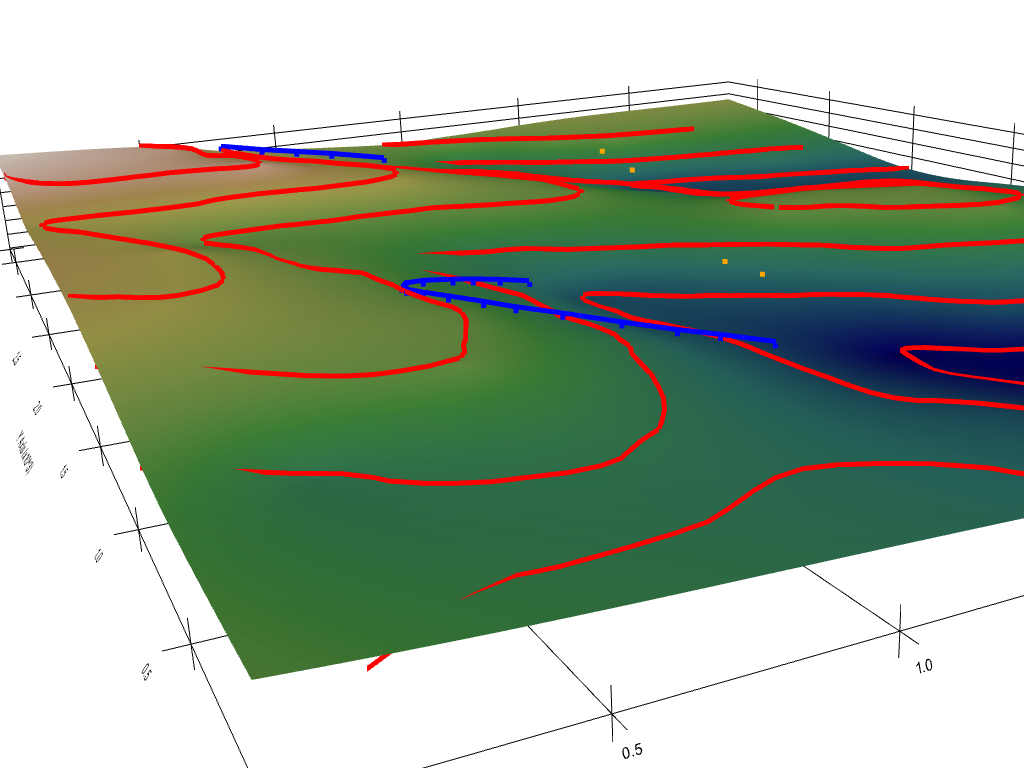

In [32]:
import pyvista as pv
p = pv.Plotter(notebook =True)
gg.visualization.plot_dem_3d(np.flipud(dem), p, cmap = 'gist_earth', extent=geo_data.extent[:4])
gg.visualization.plot_contours_3d(topo, p, color = 'red', add_to_z = 10)
gg.visualization.plot_points_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)
gg.visualization.plot_points_3d(orientations_coords, p, color = 'orange', add_to_z = 20)
gg.visualization.plot_contours_3d(interfaces_coords, p, color = 'blue', add_to_z = 10)

p.camera_position =[(-283.285811675846, -1597.1397046051004, 1155.542325449192), 
                    (577.9371599370799, 495.3480261506809, 381.7124055285182), 
                    (0.17313457304419916, 0.27814381639313923, 0.9448070898437746)]
p.set_background('white')
p.show_grid(color='black')
p.show()

# Create GemPy Model

## Importing GemPy

Please see https://docs.gempy.org/installation.html for more information on how to install GemPy.

In [33]:
import sys  
sys.path.append('../../../gempy-master')
import gempy as gp
print(gp)
print(gp.__version__)

<module 'gempy' from 'C:\\Users\\ale93371\\Anaconda3\\envs\\gemgis\\lib\\site-packages\\gempy\\__init__.py'>
2.2.6


## Creating GemPy Model

For more information on how to create a GemPy Model, please see the tutorials at: https://docs.gempy.org/tutorials/index.html. With the attributes of the GemPy Data Class, all necessary variables can be passed to the model.

In [34]:
geo_model = gp.create_model(geo_data.model_name)
geo_model

Model5  2020-10-12 23:04

In [35]:
gp.init_data(geo_model, geo_data.extent, geo_data.resolution,
             surface_points_df = geo_data.interfaces,
             orientations_df = geo_data.orientations,
             default_values=True)

Active grids: ['regular']


Model5  2020-10-12 23:04

In [36]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,Coal1,Default series,1,#015482,1


In [37]:
geo_data.stack

{'Strat_Series': 'Coal1', 'basement': 'basement'}

In [38]:
gp.map_stack_to_surfaces(geo_model,
                         geo_data.stack,
                         remove_unused_series=True)
geo_model.add_surfaces('basement')

,surface,series,order_surfaces,color,id
0,Coal1,Strat_Series,1,#015482,1
1,basement,Strat_Series,2,#9f0052,2


In [39]:
geo_model.surfaces.colors.change_colors(geo_data.surface_colors)

Click to select new colors.


C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


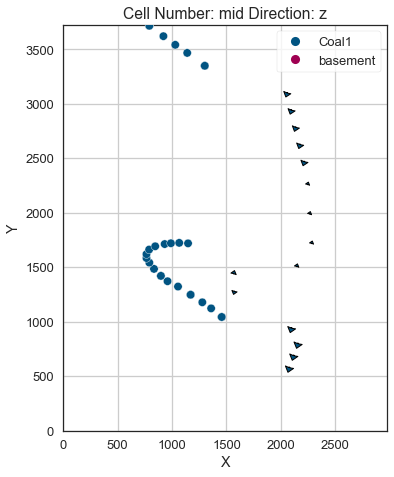

In [40]:
gp.plot_2d(geo_model, direction = 'z')
plt.grid()

A raster created with ArcGIS has to be loaded as the import of the created raster fails. This is due to a bug in `GemPy`described here: https://github.com/cgre-aachen/gempy/issues/492

In [41]:
geo_model.set_topography(
    source='gdal', filepath='../../../gemgis/data/examples/example5/topo_resampled.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  29.78      ,   37.28      , -193.        ],
       [  29.78      ,   37.28      , -179.        ],
       [  29.78      ,   37.28      , -165.        ],
       ...,
       [2973.0033557 , 3703.01340483,  272.52029419],
       [2973.0033557 , 3713.0080429 ,  273.37057495],
       [2973.0033557 , 3723.00268097,  274.21810913]])

In [42]:
geo_model.set_section_grid(geo_data.section_dict)

Active grids: ['regular' 'topography' 'sections']


,start,stop,resolution,dist
Section1,"[893.2641683642745, 2.776723868134013]","[2101.4476537800606, 3725.428751566423]","[100, 80]",3913.80


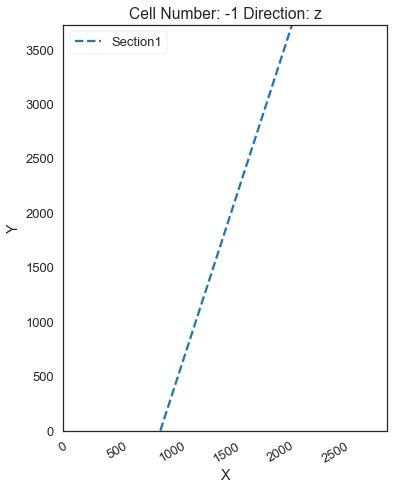

In [43]:
gp.plot.plot_section_traces(geo_model)

In [44]:
gp.set_interpolator(geo_model,
                    compile_theano=True,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging = False
                    )

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                    values
range             4822.50
$C_o$           553725.43
drift equations       [3]


In [45]:
sol = gp.compute_model(geo_model)

The geological map had to be created manually as there seems to be a bug when creating the geological map with `GemGIS`. This was reported already: https://github.com/cgre-aachen/gempy/issues/446

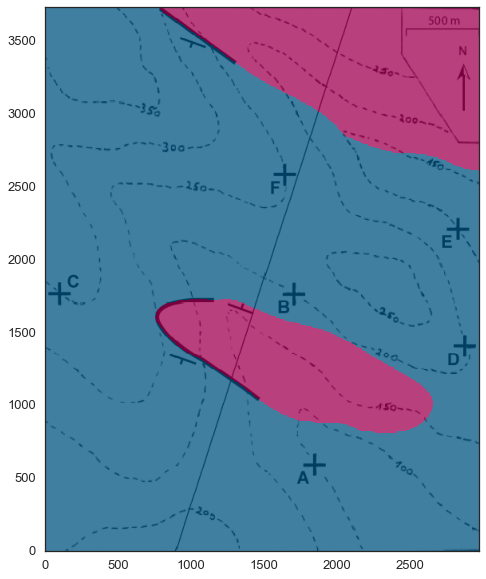

In [46]:
shape = geo_model._grid.topography.values_2d[:, :, 2].shape
geolmap = geo_model.solutions.geological_map[0].reshape(shape)
cols = ['#015482', 	'#9f0052']
plt.figure(figsize=(10, 10))
plt.imshow(np.flipud(base_map.read(1)), origin='lower',
           cmap='gray', extent=geo_data.extent[:4])
gmap = np.rot90(geolmap, 1)
plt.imshow(gmap, extent=geo_data.extent[:4],
           alpha=0.75, cmap=ListedColormap(cols))

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


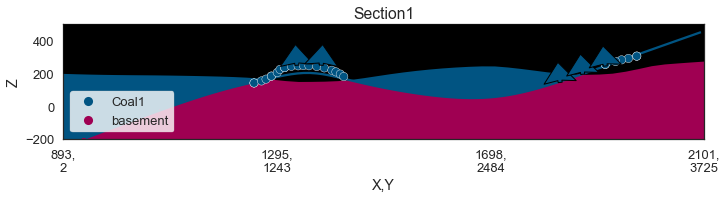

In [47]:
gp.plot_2d(geo_model, section_names=['Section1'], show_topography=True, ve = 1)

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


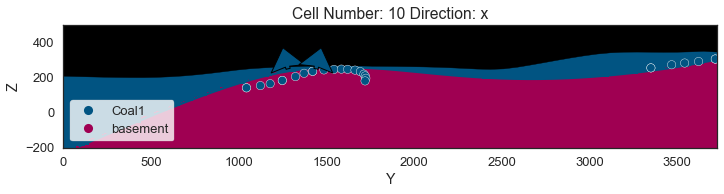

In [48]:
gp.plot_2d(geo_model, direction='x', show_topography=True, cell_number=10, ve=1)

C:\Users\ale93371\Anaconda3\envs\gemgis\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


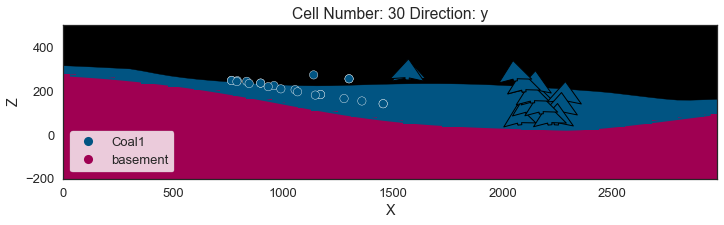

In [49]:
gp.plot_2d(geo_model, direction='y', show_topography=True, cell_number = 30)

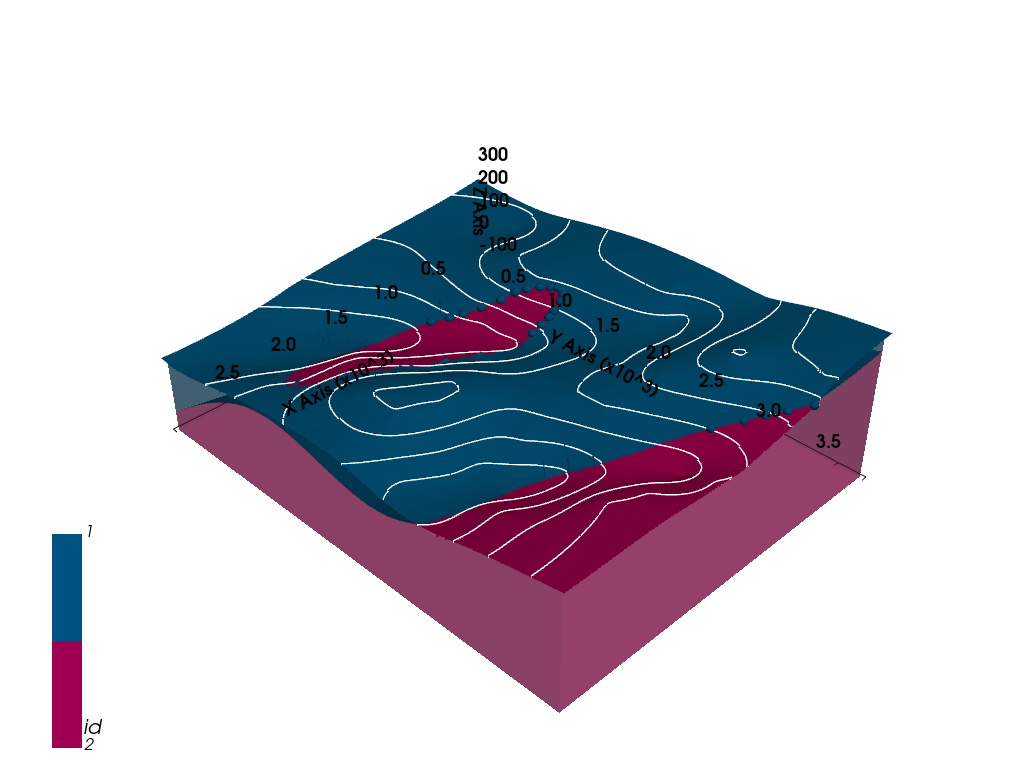

In [50]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, ve = 2)

# Postprocessing - Converting Geological Map to Shape Files

## Create GeoDataFrame with Polygons

In [51]:
gdf = gg.post.extract_lithologies(geo_model, geo_data.extent[:4], geo_data.crs)
gdf

,formation,geometry
0,basement,"POLYGON ((2253.487 814.547, 2263.480 814.044, ..."
1,basement,"POLYGON ((2973.003 2602.619, 2973.003 2603.603..."
2,Coal1,"POLYGON ((14.990 4.997, 4.997 4.997, 4.997 14...."


## Plot Polygons

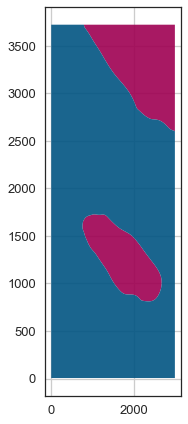

In [52]:
gdf.plot(column='formation', cmap=ListedColormap(cols), alpha=0.9)
plt.grid()

## Save Polygons as Shape Files

These polygons can now be saved as shape files and displayed for example as in QGIS shown below. 

In [53]:
gdf.to_file('../../../gemgis/data/examples/example5/liths.shp')

## Save Polygons as GeoTiff

Rasters like DEMs can be saved as georeferenced tif-files. The same can be done with the geological map obtained from `GemPy` by saving the array of the geological map as tif. 

In [54]:
gg.raster.save_as_tiff('../../../gemgis/data/examples/example5/geolmap.tif',gmap, extent=geo_data.extent, crs='EPSG:4326')

# Create borehole from Geo_Model

Geological models are used to extract information from the subsurface. As geologists, we like to look of the result of the model at a single location and down to the maximum z extent in depth. This is termed a borehole or in the case of fluid extraction a well. These boreholes can easily be extracted and displayed using GemGIS. All you need is the `geo_model` object, the `geo_data` object and the location of your borehole, optionally with its maximum depth. 

Active grids: ['regular']
Click to select new colors.


Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range             700.14
$C_o$           11671.43
drift equations      [3]


(
 Lithology ids 
   [2. 2. 2. ... 1. 1. 1.] ,
 Well_Model  2020-10-12 23:05,
 {1: 136.0, 2: -200.0})

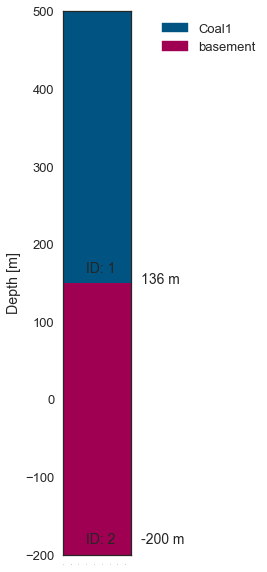

In [55]:
sol = gg.post.extract_borehole(geo_model, geo_data, [2000,2000])
sol

# Depth Maps

Depth maps indicate the depth of a surface within the model extent. By applying an intuitive color coding, the spatial position of the respective surface can easily be interpreted. Depth maps can easily be created by executing `gg.visualization.plot_depth_map(...)`. All that is needed is the `geo_model` object and the name of the surface to be plotted. Optionally, a range for the colorbar can be provided to make the maps of different surfaces comparable. Otherwise, the min and max values of each surface are taken for the limits of the color bar. By setting `notebook` to `False` an interactive PyVista Window is opened (press 'Q' to close window safely again).

## Depth Map Layer1

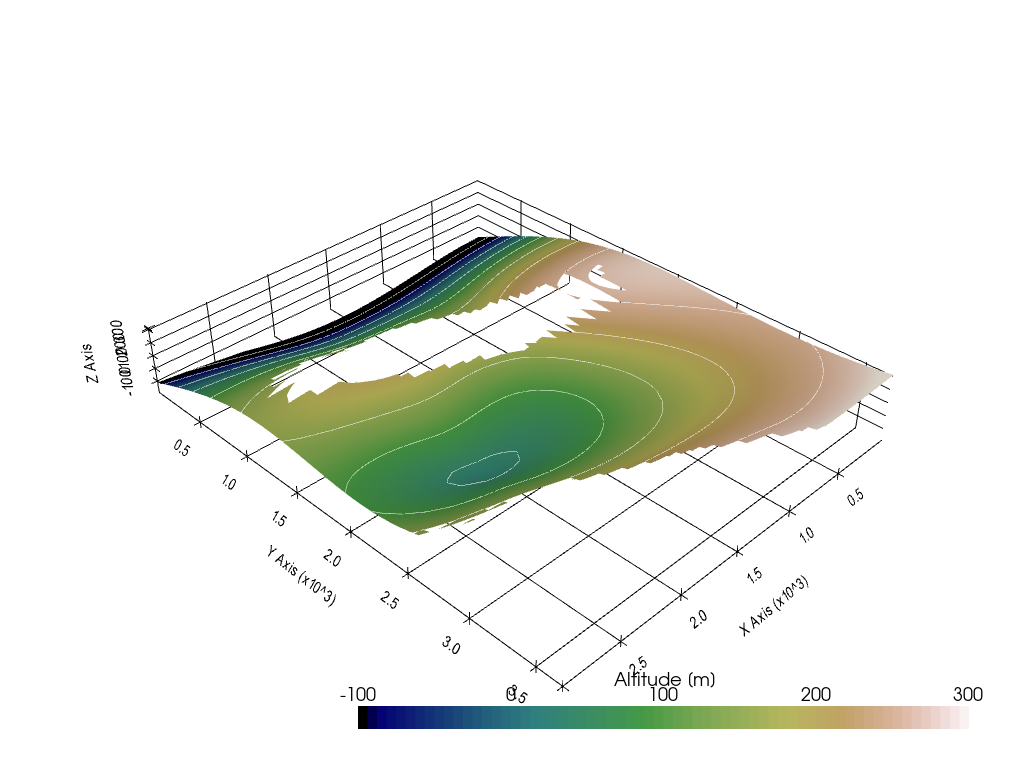

In [56]:
gg.visualization.plot_depth_map(geo_model, 'Coal1', clim=[-100, 300], notebook=True)